In [8]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt   
import seaborn as sns
from dotenv import load_dotenv
import os

load_dotenv()
db_url = os.getenv("OLIST_DB_URL")

engine = create_engine(db_url)



In [9]:
query="""show tables 
"""
df=pd.read_sql(query,engine)
df



,Tables_in_olist_dw
0,dim_customers
1,dim_orders
2,dim_products
3,dim_sellers
4,fact_order_items
5,fact_order_payments
6,fact_order_reviews
7,staging_customers
8,staging_geolocation
9,staging_order_items


In [10]:
df_orders = pd.read_sql(
    "SELECT * FROM dim_orders",
    engine
) 
df_order_items = pd.read_sql(
    "SELECT * FROM fact_order_items",
    engine
) 
df_order_payments = pd.read_sql(
    "SELECT * FROM fact_order_payments",
    engine
) 
df_order_reviews = pd.read_sql(
    "SELECT * FROM fact_order_reviews",
    engine
) 


In [11]:
df_orders.head()
#df_orders.iloc[:,[1,2]]
#df_orders=df_orders[['order_id','customer_id']]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [12]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
#df_orders.iloc[:,[1,2]]
df_orders=df_orders[['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date']]
df_order_items.rename(columns={'freight_value':'delivery_cost'},inplace=True)


#review table 
df_order_reviews=df_order_reviews[['order_id','review_score','review_creation_date']]

fact=pd.merge(df_orders,df_order_items,on='order_id')


fact.drop('shipping_limit_date',axis=1,inplace=True)
fact.head()


,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [16]:
fact=pd.merge(fact,df_order_reviews,on='order_id')
fact.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,5,2017-09-21 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,4,2017-05-13 00:00:00
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5,2018-01-23 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,4,2018-08-15 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5,2017-03-02 00:00:00


In [ ]:
df_order_payments.head()

,payment_id,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,1,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,5,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:


#df_order_items.groupby(['seller_id'])['price'].count()
#df_order_items[df_order_items['seller_id'].isin(df_order_items.nlargest(5, 'price')['seller_id'])]
#df_order_items(['price'])
df_order_items[df_order_items['price']<=6000].sort_values(['price'],ascending=False).head(5)
#df_order_items.nlargest(5,'price')


#df_order_items.plot(kind='scatter',x='price',y='seller_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,delivery_cost
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
62086,8dbc85d1447242f3b127dda390d56e19,1,259037a6a41845e455183f89c5035f18,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.00,91.78
29193,426a9742b533fc6fed17d1fd6d143d7e,1,a1beef8f3992dbd4cd8726796aa69c53,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:28,4399.87,113.45
45843,68101694e5c5dc7330c91e1bbc36214f,1,6cdf8fc1d741c76586d8b6b15e9eef30,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:27,4099.99,75.27


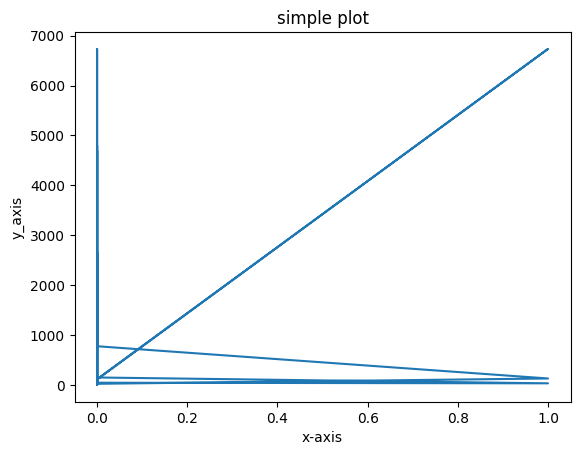

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31
41222,5de59551c282b892ae9ff238fd557145,1,679804d4938f8bf53025298b725f2eb6,e3b4998c7a498169dc7bce44e6bb6277,2017-01-20 16:24:13,32.9,10.96
77358,b017dafe7c59c8aaf92ab3fa1ca54d78,1,4bf205e4dc4e2c6b258e1ec0e2be9367,e3b4998c7a498169dc7bce44e6bb6277,2017-01-30 16:16:15,130.0,11.52


In [ ]:
plt.plot(df_order_items['seller_id']=='e3b4998c7a498169dc7bce44e6bb6277',df_order_items['price'])
plt.title("simple plot")
plt.xlabel("x-axis")
plt.ylabel("y_axis")
plt.show()
df_order_items[df_order_items['seller_id']=='e3b4998c7a498169dc7bce44e6bb6277']

In [ ]:


df_order_payments.head()


NameError: name 'pd' is not defined

In [ ]:


df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_commnent_message,review_creation_date,review_answer_timestamp
0,0001239bc1de2e33cb583967c2ca4c67,fc046d7776171871436844218f817d7d,5,,,2018-03-20 00:00:00,2018-03-20 18:36:04
1,0001cc6860aeaf5b9017fe4131a52e62,d4665434b01caa9dc3e3e78b3eb3593e,5,,,2018-06-22 00:00:00,2018-06-26 13:51:29
2,00020c7512a52e92212f12d3e37513c0,e28abf2eb2f1fbcbdc2dd0cd9a561671,5,Entrega rápida!,A entrega foi super rápida e o pendente é lind...,2018-04-25 00:00:00,2018-04-26 14:55:36
3,00032b0141443497c898b3093690af51,04fb47576993a3cb0c12d4b25eab6e4e,5,,,2017-05-30 00:00:00,2017-06-01 23:28:55
4,00034d88989f9a4c393bdcaec301537f,5f358d797a49fe2f24352f73426215f6,5,,,2017-08-12 00:00:00,2017-08-13 19:56:53


In [ ]:

df_orders = pd.read_sql(
    "SELECT * FROM dim_orders",
    engine
) 

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [ ]:


df_products.head()
df_products[df_products['product_id']=='489ae2aa008f021502940f251d4cce7f']


,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9434,489ae2aa008f021502940f251d4cce7f,housewares\r,2,30000,60,61,33
